<a href="https://colab.research.google.com/github/soulqan/Machine_Learning_2025/blob/main/JS04_prkatikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/ML/Iris.csv')

df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
# Seleksi Fitur
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

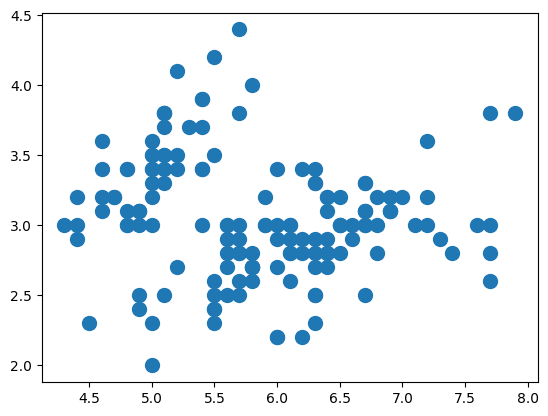

In [4]:
# Plot Data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

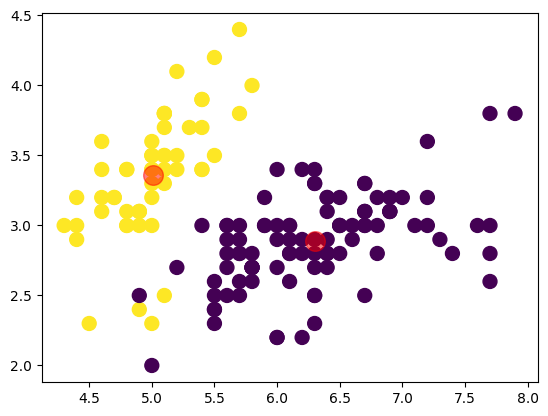

In [5]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [6]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


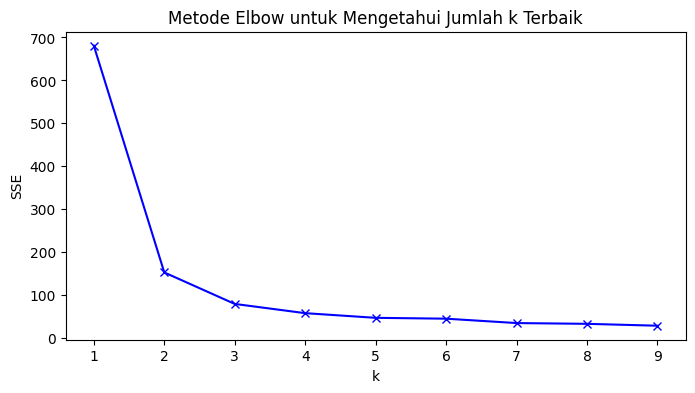

In [7]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [8]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.44028021295475
k=5; SSE=46.56163015873017
k=6; SSE=44.56980738263348
k=7; SSE=34.36574278696133
k=8; SSE=32.58526497274867
k=9; SSE=28.169278927996327


# Praktikum 2

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

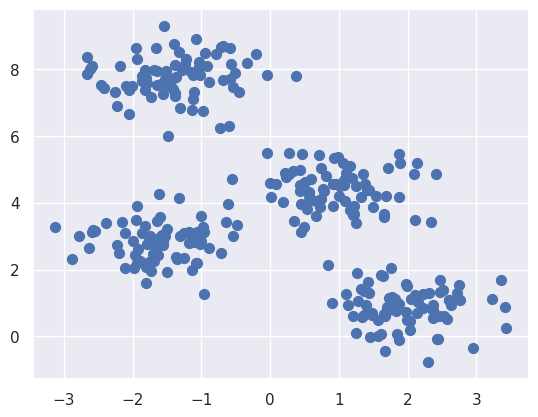

In [10]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

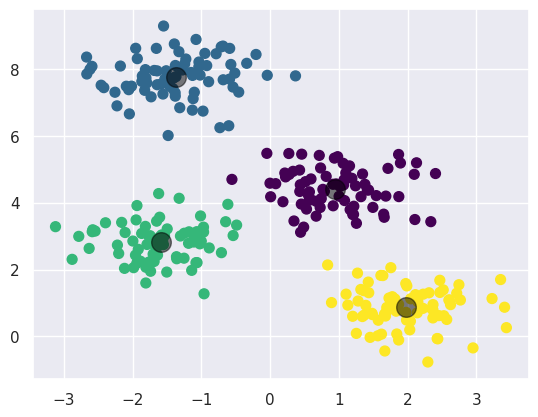

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

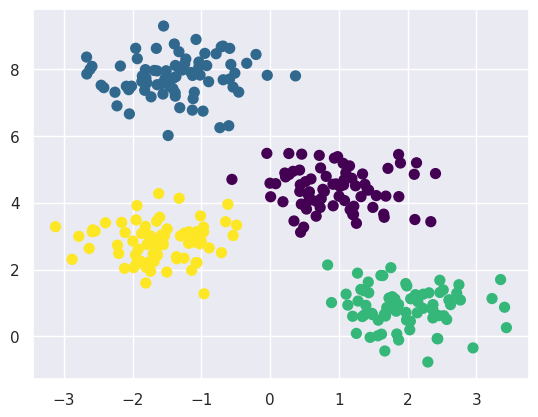

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

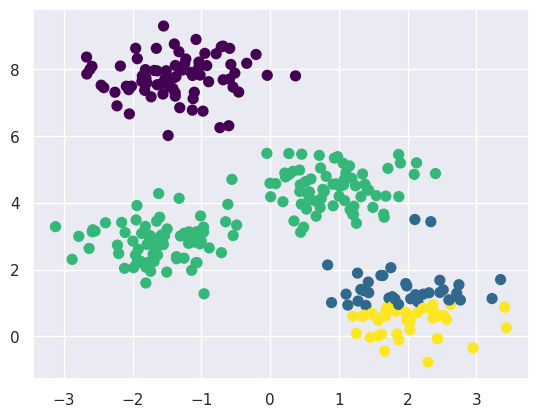

In [13]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

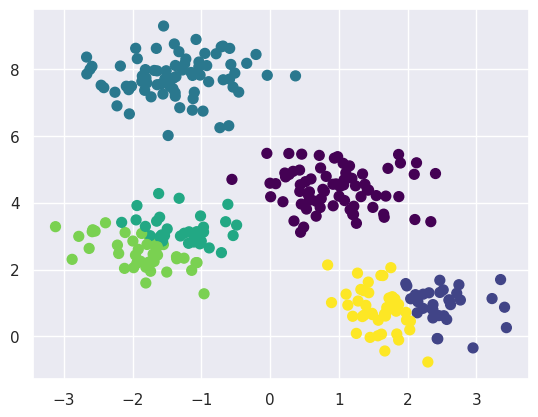

In [14]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

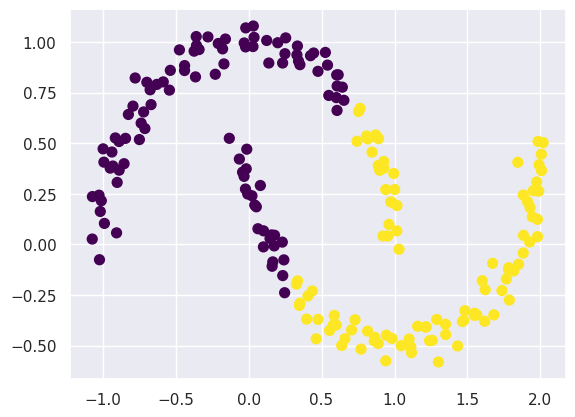

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


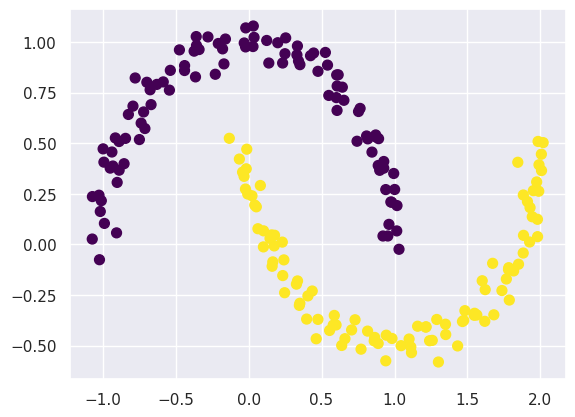

In [16]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Contoh Kasus 1**

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

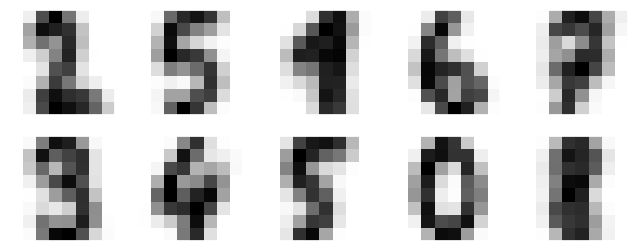

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [20]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

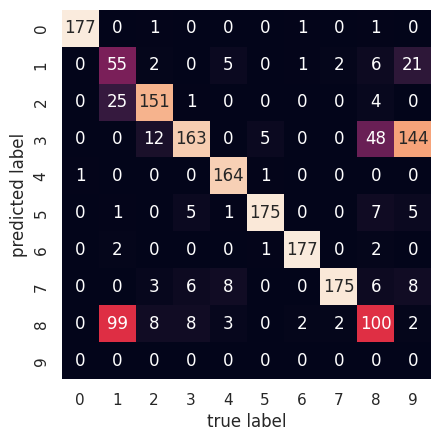

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

**Contoh Kasus 2**

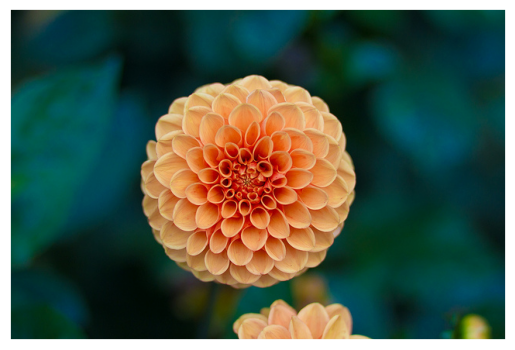

In [23]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [24]:
flower.shape

(427, 640, 3)

In [25]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

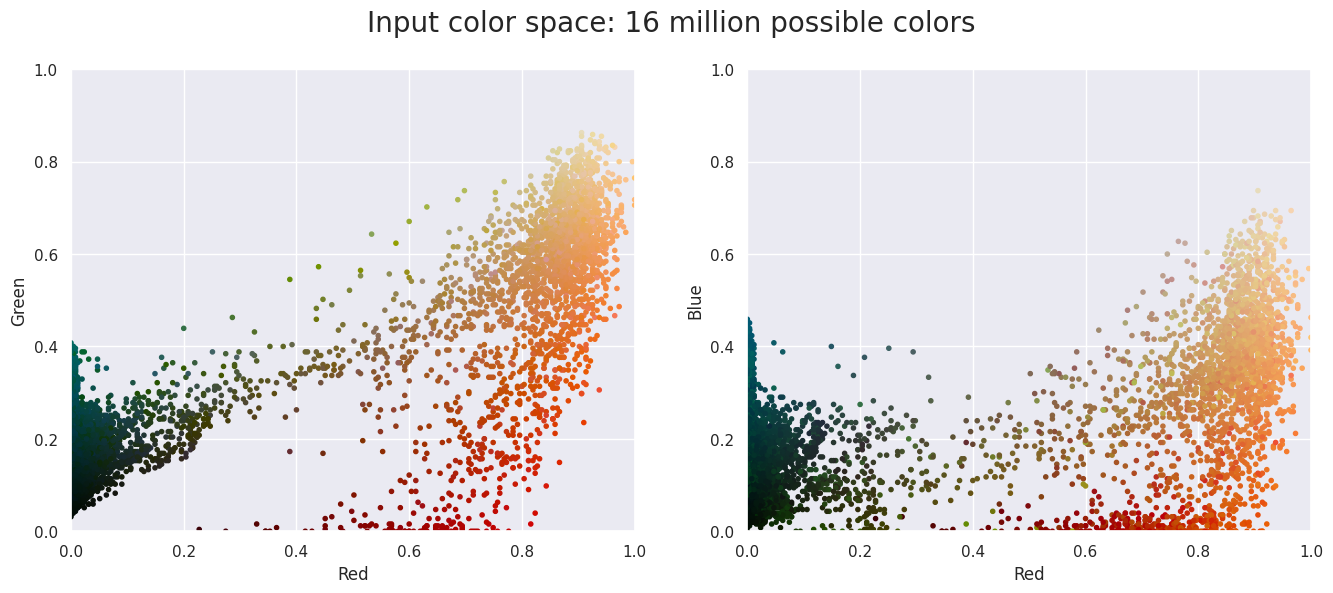

In [26]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

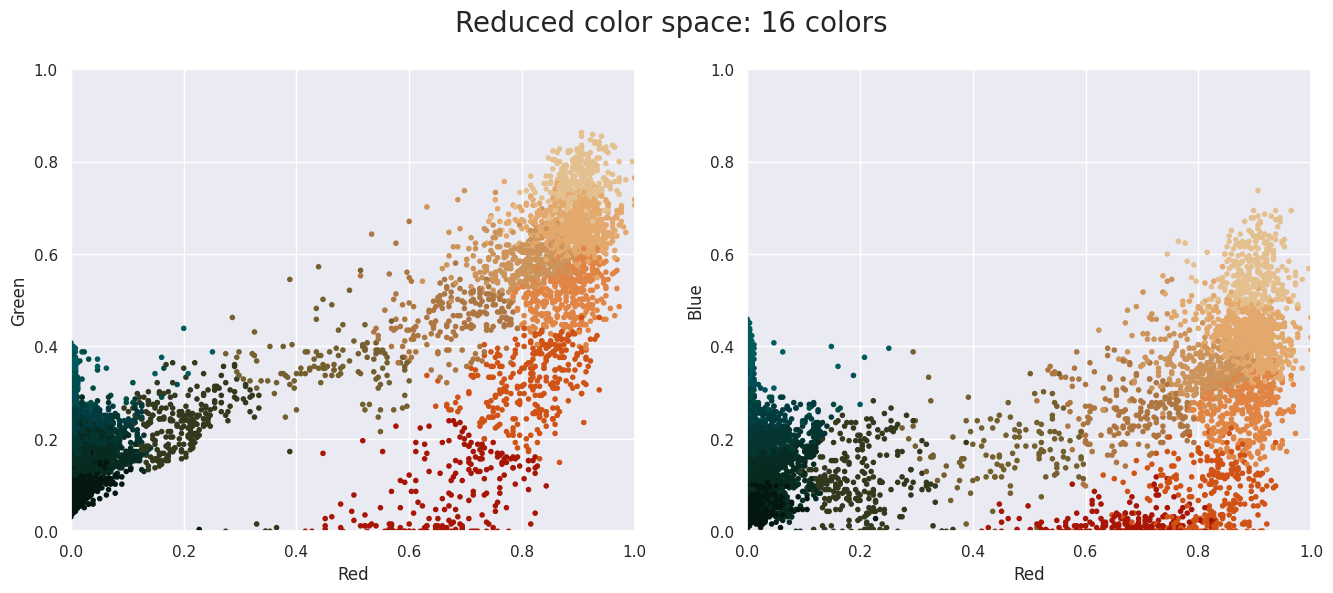

In [27]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

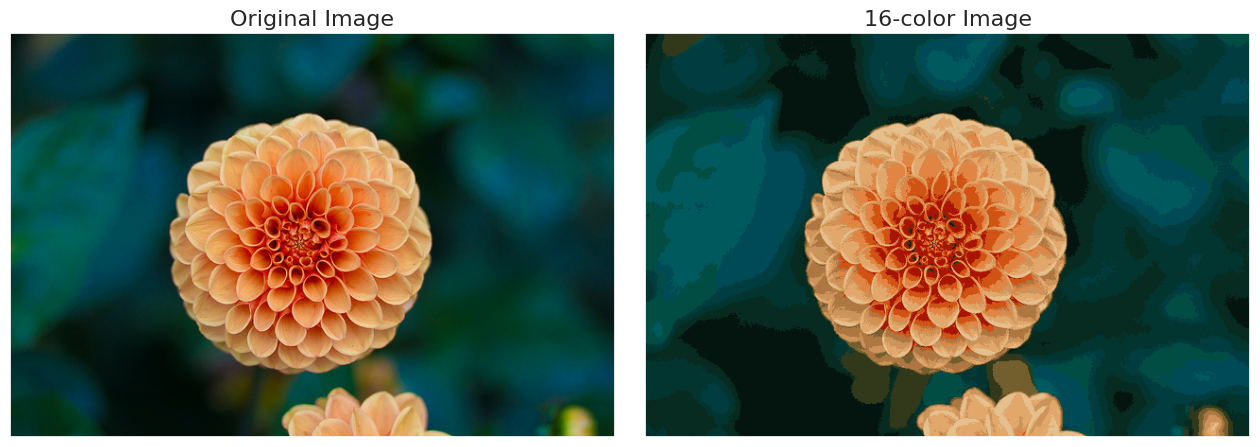

In [28]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

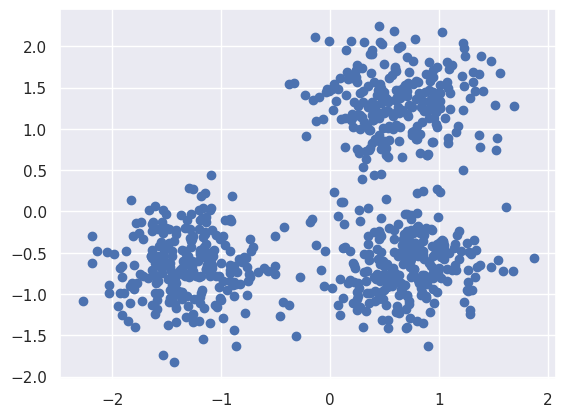

In [29]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

**Compute DBSCAN**

In [31]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


**Evaluasi Kulitas Klasterisasi**

In [32]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**Visualisasi Hasil Klasterisasi**

'Estimated number of clusters: 3'

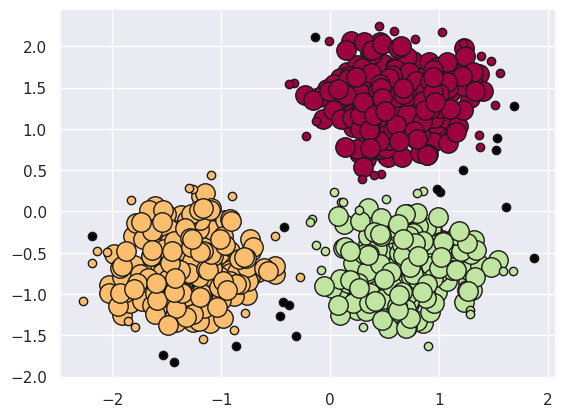

In [33]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

(f"Estimated number of clusters: {n_clusters_}")

# Tugas Praktikum JS4

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [43]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

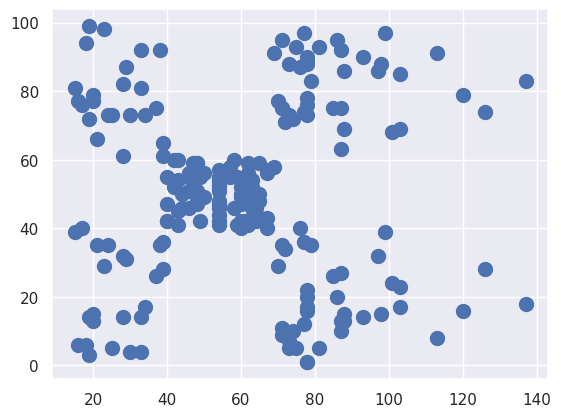

In [44]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

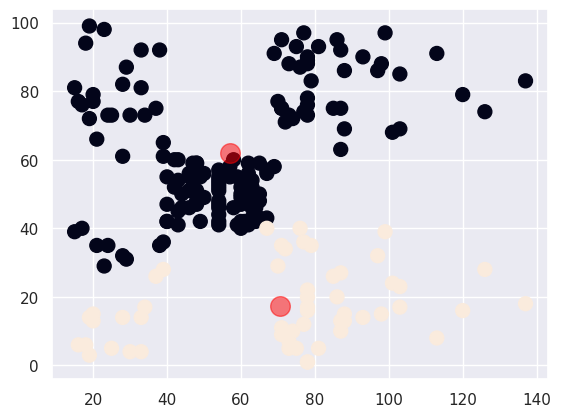

In [47]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [48]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 184609.98434090626


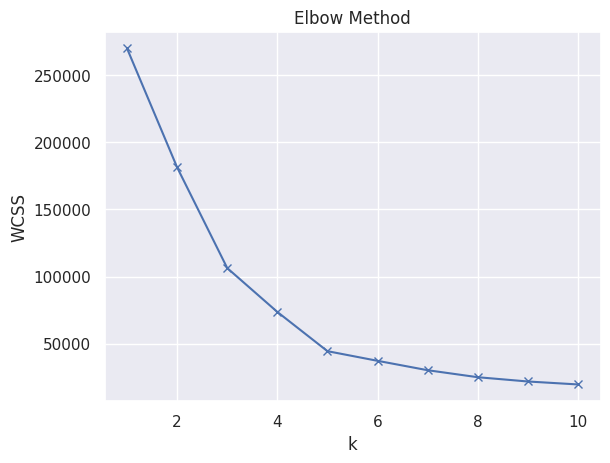

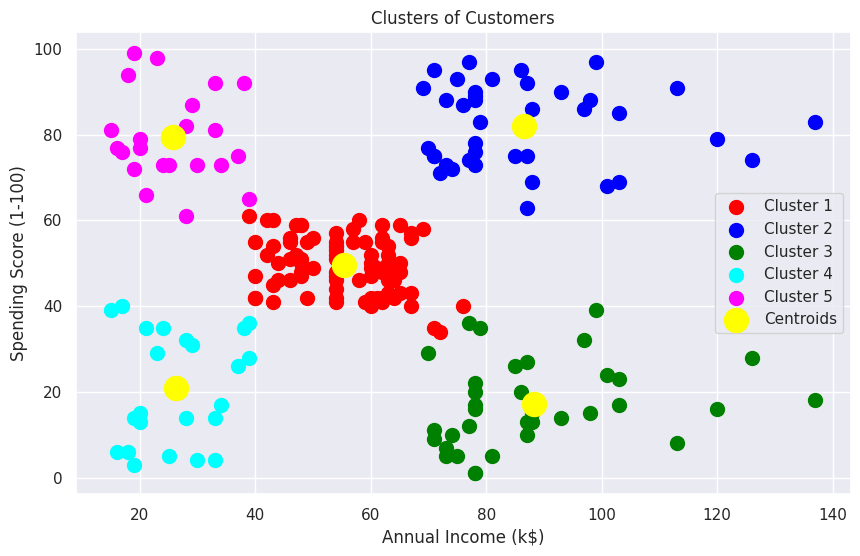

In [49]:
# --- Find the best K using the Elbow Method ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss,  "bx-")
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()
print()
plt.close()

# --- Build K-Means model with the best K (K=5) ---
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# --- Visualize the clusters ---
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
plt.close()

**Tugas DBScan**

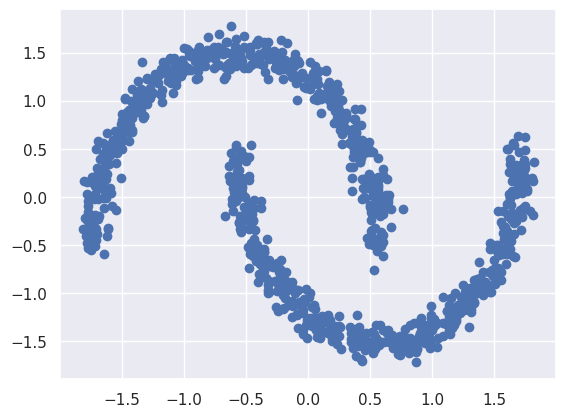

In [50]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, labels_true = make_moons(
    n_samples=1000, noise=0.05, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [51]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)

def cluster_noise_count(db, eps, min_samples):
  labels = db.labels_

  unique_labels = set(labels)

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print(f"Cluster & Noise on eps={eps} min_samples={min_samples}")
  print("-------------------------------------")
  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  print("-------------------------------------\n")

cluster_noise_count(db, 0.2, 5)


Cluster & Noise on eps=0.2 min_samples=5
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------



In [53]:
from sklearn import metrics

def metrics_evaluation(db, eps, min_samples):
  labels = db.labels_

  print(f"Metrics Evaluation on eps={eps} min_samples={min_samples}")
  print("-------------------------------------")
  print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
  print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
  print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
  print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
  print(
      "Adjusted Mutual Information:"
      f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
  )
  print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
  print("-------------------------------------\n")

metrics_evaluation(db, 0.2, 5)

Metrics Evaluation on eps=0.2 min_samples=5
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



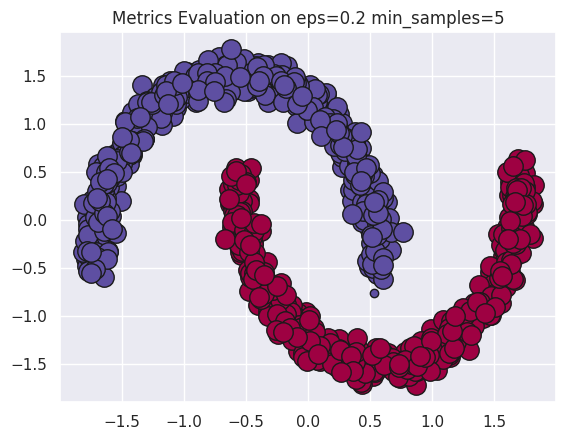

In [54]:
def dbscan_visualization(db, eps, min_samples):
  labels = db.labels_

  unique_labels = set(labels)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True

  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = labels == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )
  plt.title(f"Metrics Evaluation on eps={eps} min_samples={min_samples}")

  plt.show()
  print("\n")
  plt.close()

dbscan_visualization(db, 0.2, 5)

Cluster & Noise on eps=0.05 min_samples=3
-------------------------------------
Estimated number of clusters: 67
Estimated number of noise points: 197
-------------------------------------

Metrics Evaluation on eps=0.05 min_samples=3
-------------------------------------
Homogeneity: 0.804
Completeness: 0.155
V-measure: 0.260
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.246
Silhouette Coefficient: 0.078
-------------------------------------



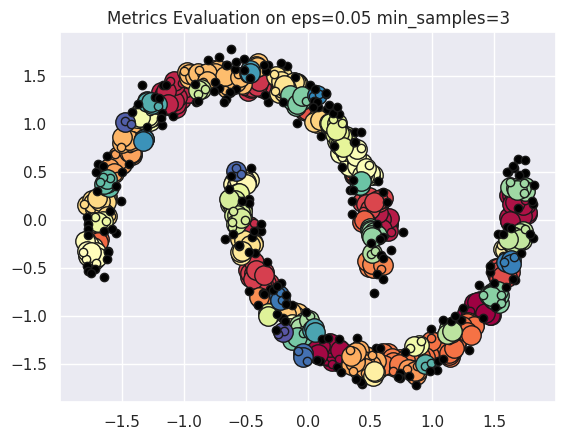



Cluster & Noise on eps=0.05 min_samples=10
-------------------------------------
Estimated number of clusters: 0
Estimated number of noise points: 1000
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



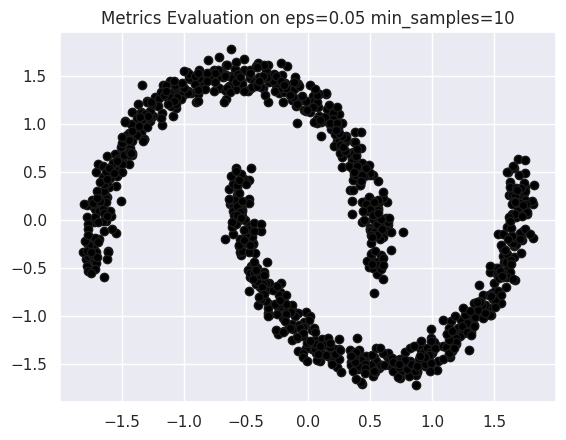



Cluster & Noise on eps=0.05 min_samples=20
-------------------------------------
Estimated number of clusters: 0
Estimated number of noise points: 1000
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



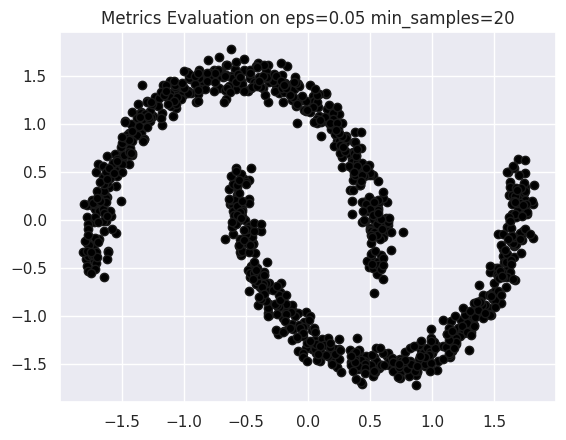



Cluster & Noise on eps=0.1 min_samples=3
-------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 18
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=3
-------------------------------------
Homogeneity: 0.983
Completeness: 0.708
V-measure: 0.824
Adjusted Rand Index: 0.854
Adjusted Mutual Information: 0.823
Silhouette Coefficient: 0.138
-------------------------------------



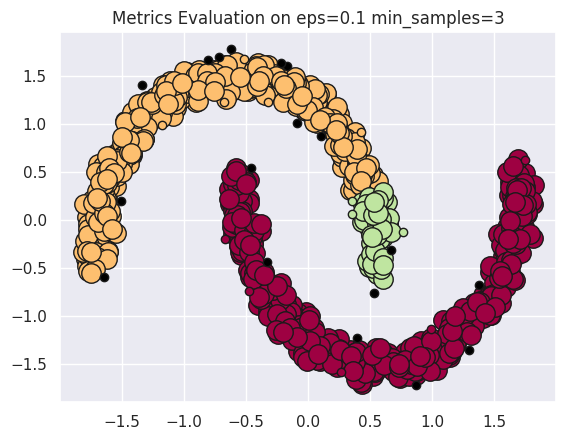



Cluster & Noise on eps=0.1 min_samples=10
-------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 63
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=10
-------------------------------------
Homogeneity: 0.939
Completeness: 0.358
V-measure: 0.519
Adjusted Rand Index: 0.435
Adjusted Mutual Information: 0.517
Silhouette Coefficient: 0.184
-------------------------------------



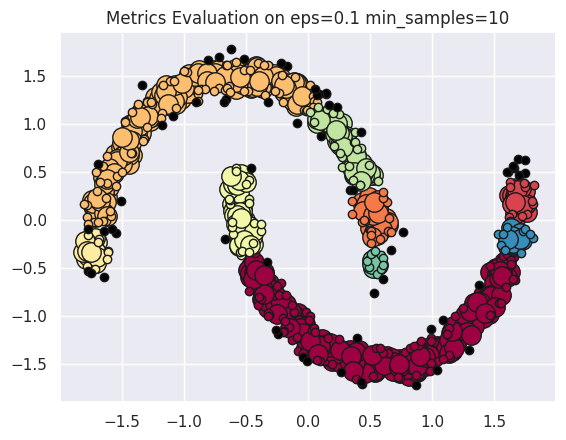



Cluster & Noise on eps=0.1 min_samples=20
-------------------------------------
Estimated number of clusters: 6
Estimated number of noise points: 844
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=20
-------------------------------------
Homogeneity: 0.157
Completeness: 0.153
V-measure: 0.155
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.152
Silhouette Coefficient: -0.409
-------------------------------------



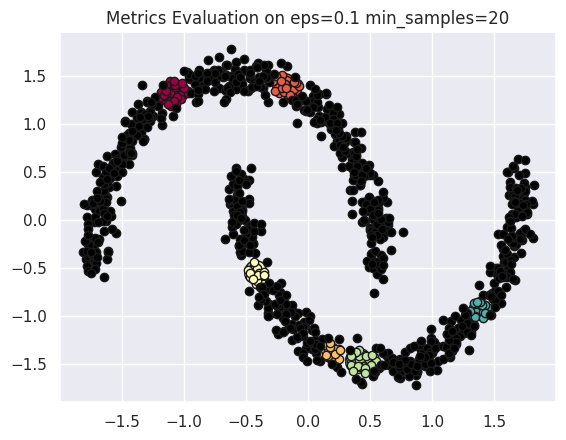



Cluster & Noise on eps=0.3 min_samples=3
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=3
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



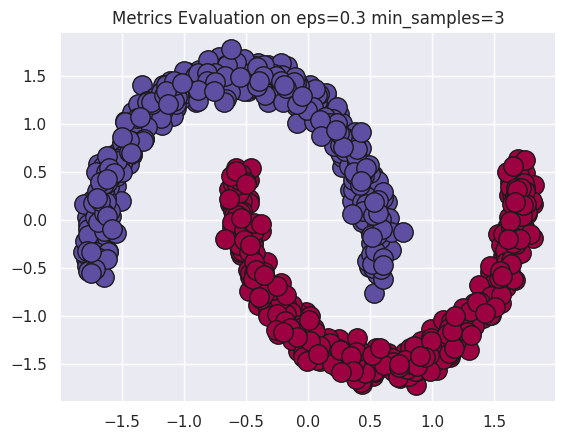



Cluster & Noise on eps=0.3 min_samples=10
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=10
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



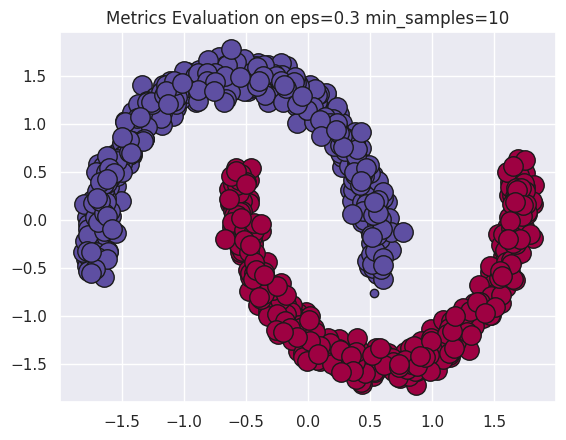



Cluster & Noise on eps=0.3 min_samples=20
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=20
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



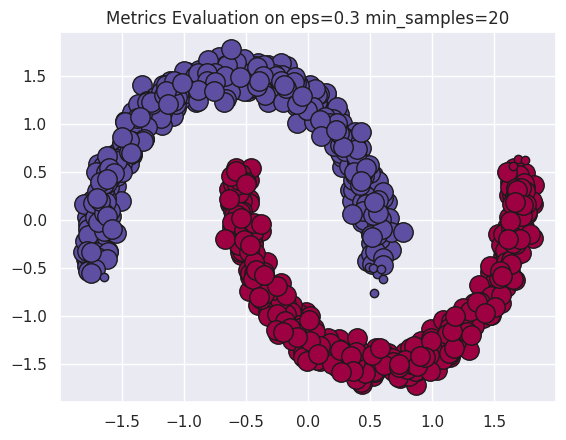



Cluster & Noise on eps=0.5 min_samples=3
-------------------------------------
Estimated number of clusters: 1
Estimated number of noise points: 0
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



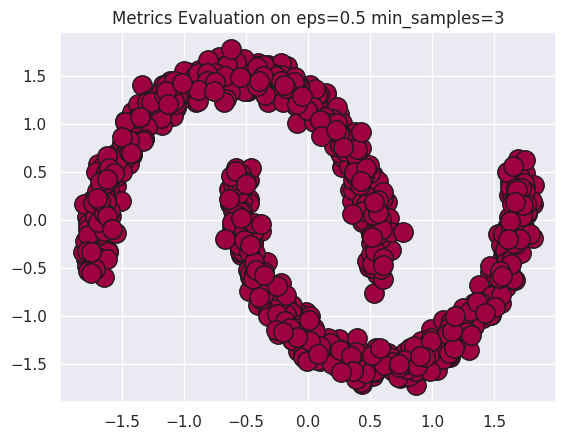



Cluster & Noise on eps=0.5 min_samples=10
-------------------------------------
Estimated number of clusters: 1
Estimated number of noise points: 0
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



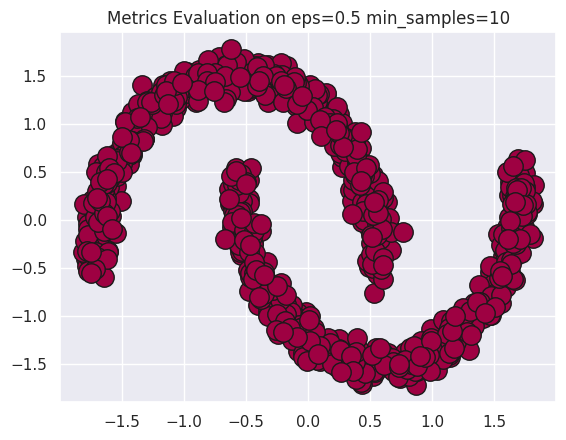



Cluster & Noise on eps=0.5 min_samples=20
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.5 min_samples=20
-------------------------------------
Homogeneity: 0.990
Completeness: 0.990
V-measure: 0.990
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.990
Silhouette Coefficient: 0.393
-------------------------------------



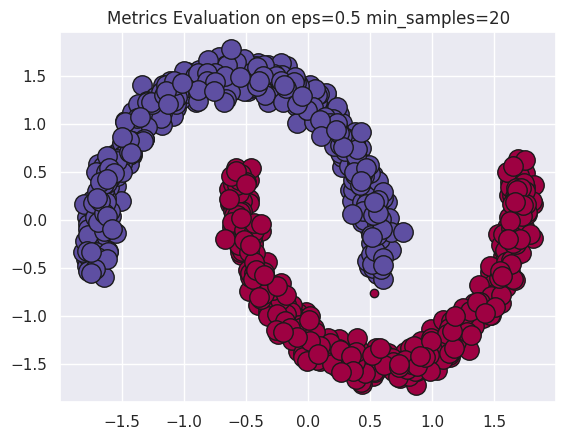

In [55]:
eps_exp = [0.05, 0.1, 0.3, 0.5]
min_samples_exp = [3, 10, 20]

for eps in eps_exp:
  for min_samples in min_samples_exp:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    cluster_noise_count(db, eps, min_samples)

    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters_ > 1:
        metrics_evaluation(db, eps, min_samples)
    else:
        print("Skipping metrics evaluation because 1 or fewer clusters were found.\n")

    dbscan_visualization(db, eps, min_samples)